In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import make_pipeline
import statistics
import datetime
import calendar

In [3]:
bike_day = pd.read_csv(r"C:\Users\Lucia\Desktop\Data Analytics\Bike Project\day.csv")
bike_hour = pd.read_csv(r"C:\Users\Lucia\Desktop\Data Analytics\Bike Project\hour.csv")

In [4]:
# Creating a DataFrame
day = pd.DataFrame(bike_day)
hour = pd.DataFrame(bike_hour)

In [5]:
day['dteday'] = pd.to_datetime(day['dteday'], format='%Y/%m/%d')
day_mini = day['day'] = day['dteday'].dt.day

In [6]:
# Isna: Detect missing values for an array-like object. 
# This function takes a scalar or array-like object and indicates whether values are missing
# Shape: Printing number of rows and columns 

day.shape
day.isna()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
727,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
729,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# rounding the numb after the comma 
day = round(day, 2)
hour = round(day, 2)

In [8]:
#printing the first rows
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,2011-01-01,1,0,1,0,6,0,2,0.34,0.36,0.81,0.16,331,654,985,1
1,2,2011-01-02,1,0,1,0,0,0,2,0.36,0.35,0.70,0.25,131,670,801,2
2,3,2011-01-03,1,0,1,0,1,1,1,0.20,0.19,0.44,0.25,120,1229,1349,3
3,4,2011-01-04,1,0,1,0,2,1,1,0.20,0.21,0.59,0.16,108,1454,1562,4
4,5,2011-01-05,1,0,1,0,3,1,1,0.23,0.23,0.44,0.19,82,1518,1600,5


In [9]:
day.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
726,727,2012-12-27,1,1,12,0,4,1,2,0.25,0.23,0.65,0.35,247,1867,2114,27
727,728,2012-12-28,1,1,12,0,5,1,2,0.25,0.26,0.59,0.16,644,2451,3095,28
728,729,2012-12-29,1,1,12,0,6,0,2,0.25,0.24,0.75,0.12,159,1182,1341,29
729,730,2012-12-30,1,1,12,0,0,0,1,0.26,0.23,0.48,0.35,364,1432,1796,30
730,731,2012-12-31,1,1,12,0,1,1,2,0.22,0.22,0.58,0.15,439,2290,2729,31


In [10]:
#Find the total number of missing values from the entire dataset
day.isnull().sum()
hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
day           0
dtype: int64

In [11]:
day.info()
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
 16  day         731 non-null  

In [12]:
# Renaming the Columns


day.rename(columns={"instant": "ID", "dteday": "date", "yr": "year", "mnth": "month", "atemp": "ftemp", "cnt": "count"})
hour.rename(columns={"instant": "ID", "dteday": "date", "yr": "year", "mnth": "month", "atemp": "ftemp", "cnt": "count", "hr": "hour"})

,ID,date,season,year,month,holiday,weekday,workingday,weathersit,temp,ftemp,hum,windspeed,casual,registered,count,day
0,1,2011-01-01,1,0,1,0,6,0,2,0.34,0.36,0.81,0.16,331,654,985,1
1,2,2011-01-02,1,0,1,0,0,0,2,0.36,0.35,0.70,0.25,131,670,801,2
2,3,2011-01-03,1,0,1,0,1,1,1,0.20,0.19,0.44,0.25,120,1229,1349,3
3,4,2011-01-04,1,0,1,0,2,1,1,0.20,0.21,0.59,0.16,108,1454,1562,4
4,5,2011-01-05,1,0,1,0,3,1,1,0.23,0.23,0.44,0.19,82,1518,1600,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.25,0.23,0.65,0.35,247,1867,2114,27
727,728,2012-12-28,1,1,12,0,5,1,2,0.25,0.26,0.59,0.16,644,2451,3095,28
728,729,2012-12-29,1,1,12,0,6,0,2,0.25,0.24,0.75,0.12,159,1182,1341,29
729,730,2012-12-30,1,1,12,0,0,0,1,0.26,0.23,0.48,0.35,364,1432,1796,30


In [13]:
# convert integer to categorical

# converting season day
day['season'] = day.season.map({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}).astype('category')
hour['season'] = day.season.map({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}).astype('category')

# converting month
day['month'] = day.season.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Okt', 11: 'Nov', 12: 'Dec'}).astype('category')
hour['month'] = hour.season.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Okt', 11: 'Nov', 12: 'Dec'}).astype('category')

Text(0.5, 1.0, 'Casual')

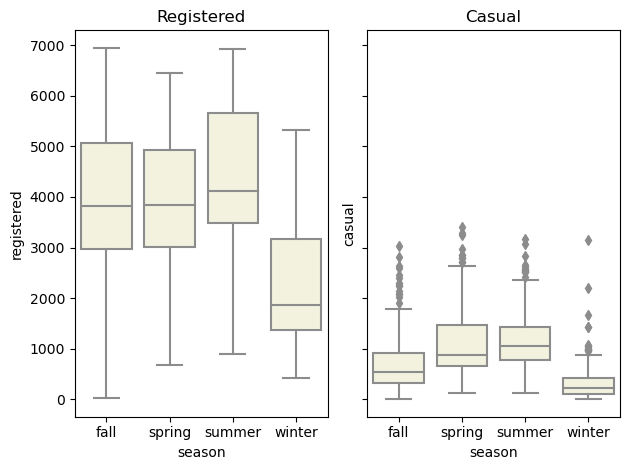

In [17]:
fig, axs = plt.subplots(1, 2, sharey="row", tight_layout=True) 

sns.boxplot(ax = axs[0], data=day, x="season", y="registered", color='beige').set_title('Registered')
sns.boxplot(ax = axs[1], data=day, x="season", y="casual", color='beige').set_title('Casual')